# Usage (details: policy measures)
Here, we will analyse the relationship of policy measures and parameter values of SIR-derived ODE models. Policy measures are tracked by [Oxford Covid-19 Government Response Tracker (OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker).

## Preparation

In [1]:
# Standard users
# !pip install covsirphy
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [2]:
from pprint import pprint

In [3]:
import covsirphy as cs
cs.__version__

'2.8.3'

In [4]:
# Standard users and developers
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=False)
# Population in each country
population_data = data_loader.population(verbose=False)
# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt(verbose=False)
# Description/citation
print(oxcgrt_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

## Class for policy measure analysis
We will `PolicyMeasures` class to find relationship of policy measures and parameter values of SIR-derived ODE models.

In [5]:
# Create analyser with tau value 360 [min] (can be changed)
analyser = cs.PolicyMeasures(jhu_data, population_data, oxcgrt_data, tau=360)
# The number of registerd countries
len(analyser.countries)

184

In [6]:
# We can get Scenario instance for detailed scenario analysis
type(analyser.scenario("Japan"))

covsirphy.analysis.scenario.Scenario

## Set phases with S-R trend analysis
We will perform S-R trend analysis to set phases in all countries. Countries which do not have **9th phases** will be un-registered for the next analysis. This number will be adjusted for your analysis.

In [7]:
# Show the number of phases of all countries
analyser.trend()
pprint(analyser.phase_len(), compact=True)

{

3

: 

['Tanzania', 'Dominica', 'Myanmar']

,
 

4

: 

['Brunei', 'Trinidad and Tobago', 'Libya', 'Belize', 'Papua New Guinea']

,
 

5

: 

[

'Antigua and Barbuda'

, 

'Fiji'

, 

'Namibia'

, 

'Tunisia'

, 

'Mauritius'

,
     

'Bahamas'

, 

'Lebanon'

, 

'Lesotho'

, 

'Seychelles'

, 

'Grenada'

]

,
 

6

: 

[

'Gambia'

, 

'Yemen'

, 

'Liechtenstein'

, 

'Ireland'

, 

'Guyana'

, 

'Croatia'

,
     

'Malta'

, 

'Cambodia'

, 

'Venezuela'

, 

'Mongolia'

, 

'Kazakhstan'

, 

'Vietnam'

,
     

'Angola'

, 

'Netherlands'

, 

'Sao Tome and Principe'

, 

'South Sudan'

, 

'Norway'

,
     

'Central African Republic'

, 

'Monaco'

, 

'Kyrgyzstan'

, 

'Botswana'

, 

'Jamaica'

,
     

'Jordan'

, 

'Uganda'

]

,
 

7

: 

[

'Rwanda'

, 

'Spain'

, 

'Zimbabwe'

, 

'Colombia'

, 

'Ethiopia'

, 

'Slovakia'

,
     

'Philippines'

, 

'Australia'

, 

'Equatorial Guinea'

, 

'Cameroon'

, 

'Mozambique'

,
     

'Malawi'

, 

'Palestine'

, 

'India'

, 

'Thailand'

, 

'Maldives'

, 

'Paraguay'

,
     

'Zambia'

, 

'Barbados'

, 

'Kosovo'

, 

'Kenya'

, 

'Syria'

, 

'Taiwan'

, 

'Bhutan'

,
     

'Montenegro'

, 

'Guatemala'

, 

'Comoros'

, 

'New Zealand'

,
     

'Saint Vincent and the Grenadines'

, 

'San Marino'

, 

'Eritrea'

, 

'Afghanistan'

,
     

'Morocco'

, 

'Madagascar'

, 

'Cyprus'

, 

'Guinea-Bissau'

, 

'Saint Lucia'

,
     

'Iceland'

]

,
 

8

: 

[

'Tajikistan'

, 

'Oman'

, 

'Niger'

, 

'Israel'

, 

'Mauritania'

, 

'Djibouti'

,
     

'Sri Lanka'

, 

'Congo'

, 

'Japan'

, 

'Bosnia and Herzegovina'

, 

'Costa Rica'

,
     

'South Africa'

, 

'Sierra Leone'

, 

'Nicaragua'

, 

'Slovenia'

, 

'Nepal'

,
     

'Bermuda'

, 

'Chad'

, 

'Suriname'

, 

'Georgia'

, 

'Burundi'

, 

'Romania'

,
     

'Argentina'

, 

'Swaziland'

, 

'Uruguay'

, 

'Ghana'

, 

'Greece'

]

,
 

9

: 

[

'Germany'

, 

'Benin'

, 

'Ukraine'

, 

'Qatar'

, 

'Albania'

, 

'Azerbaijan'

, 

'China'

,
     

'Canada'

, 

'Armenia'

, 

'Pakistan'

, 

'Ecuador'

, 

'Mali'

, 

'Chile'

, 

'Austria'

,
     

'Cape Verde'

, 

'Andorra'

, 

'Iraq'

, 

'Belarus'

, 

'Korea, South'

, 

'Finland'

,
     

'Luxembourg'

, 

'El Salvador'

, 

'Uzbekistan'

, 

'Haiti'

, 

'Somalia'

,
     

'Czech Republic'

, 

'Lithuania'

, 

'Sudan'

, 

'Liberia'

, 

'Indonesia'

]

,
 

10

: 

[

'Nigeria'

, 

'Egypt'

, 

'Poland'

, 

'Belgium'

, 

'Panama'

, 

'Estonia'

,
      

'Saudi Arabia'

, 

'Gabon'

, 

'Honduras'

, 

'Latvia'

, 

'Cuba'

,
      

'Dominican Republic'

, 

'Algeria'

, 

'Switzerland'

, 

'Togo'

, 

'Bulgaria'

,
      

'Serbia'

, 

'Singapore'

, 

'Malaysia'

, 

'Bangladesh'

, 

'Denmark'

,
      

'Burkina Faso'

, 

'Moldova'

, 

'Macedonia'

, 

'Senegal'

]

,
 

11

: 

[

'Brazil'

, 

'Bolivia'

, 

'Mexico'

, 

'Bahrain'

, 

'Guinea'

, 

'Hungary'

, 

'Kuwait'

,
      

'United States'

, 

'Iran'

, 

'Portugal'

, 

'Turkey'

, 

'Peru'

, 

'Italy'

]

,
 

12

: 

['France', 'United Arab Emirates']

,
 

13

: 

['Russia']

}

In [8]:
# Set phases with S-R trend analysis
analyser.trend(min_len=11)
# The number of countries
len(analyser.countries)

16

In [9]:
phase_len_dict = analyser.phase_len()
pprint(phase_len_dict, compact=True)

{

11

: 

[

'Brazil'

, 

'Bolivia'

, 

'Mexico'

, 

'Bahrain'

, 

'Guinea'

, 

'Hungary'

, 

'Kuwait'

,
      

'United States'

, 

'Iran'

, 

'Portugal'

, 

'Turkey'

, 

'Peru'

, 

'Italy'

]

,
 

12

: 

['France', 'United Arab Emirates']

,
 

13

: 

['Russia']

}

In [10]:
# Here, only show the countries which have the most phases
countries_show = max(phase_len_dict.items(), key=lambda x: x[0])[1]
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population
Country Phase                                        
Russia  0th    Past  12Feb2020  06May2020   330457362
        1st    Past  07May2020  15May2020   330457362
        2nd    Past  16May2020  23May2020   330457362
        3rd    Past  24May2020  01Jun2020   330457362
        4th    Past  02Jun2020  11Jun2020   330457362
        5th    Past  12Jun2020  20Jun2020   330457362
        6th    Past  21Jun2020  30Jun2020   330457362
        7th    Past  01Jul2020  12Jul2020   330457362
        8th    Past  13Jul2020  24Jul2020   330457362
        9th    Past  25Jul2020  07Aug2020   330457362
        10th   Past  08Aug2020  22Aug2020   330457362
        11th   Past  23Aug2020  04Sep2020   330457362
        12th   Past  05Sep2020  19Sep2020   330457362

## Parameter estimation
we will estimate the parameter values with SIR-derived ODE models in each country.

In [11]:
# Parameter estimation with SIR-F model
analyser.estimate(cs.SIRF)


<SIR-F model: parameter estimation>

Running optimization with 4 CPUs...

	IRN,  6th phase (01Jul2020 - 14Jul2020): finished  247 trials in 0 min  5 sec

	BRA,  7th phase (06Aug2020 - 13Aug2020): finished  461 trials in 0 min 10 sec

	BRA,  4th phase (09Jul2020 - 20Jul2020): finished  464 trials in 0 min 10 sec

	TUR,  8th phase (04Aug2020 - 19Aug2020): finished  471 trials in 0 min 10 sec

	ITA,  8th phase (14Jun2020 - 31Jul2020): finished  646 trials in 0 min 15 sec

	KWT,  6th phase (16Jul2020 - 27Jul2020): finished  248 trials in 0 min  5 sec

	MEX,  7th phase (06Aug2020 - 14Aug2020): finished 1995 trials in 1 min  0 sec

	RUS,  1st phase (07May2020 - 15May2020): finished 2001 trials in 1 min  0 sec

	FRA,  3rd phase (13Apr2020 - 21Apr2020): finished 1968 trials in 1 min  0 sec

	PRT,  0th phase (14Mar2020 - 28Apr2020): finished 1898 trials in 1 min  0 sec

	RUS, 11th phase (23Aug2020 - 04Sep2020): finished 1134 trials in 0 min 30 sec

	FRA,  8th phase (20Jul2020 - 06Aug2020): finished  441 trials in 0 min 10 sec

	TUR,  9th phase (20Aug2020 - 04Sep2020): finished  235 trials in 0 min  5 sec

	USA,  8th phase (09Aug2020 - 20Aug2020): finished 1916 trials in 1 min  0 sec

	RUS,  8th phase (13Jul2020 - 24Jul2020): finished 1804 trials in 1 min  0 sec

	PER,  6th phase (01Aug2020 - 10Aug2020): finished 1607 trials in 1 min  0 sec

	GIN,  1st phase (01May2020 - 11May2020): finished 1617 trials in 1 min  0 sec

	FRA,  6th phase (28May2020 - 23Jun2020): finished 1419 trials in 1 min  0 sec

	IRN,  9th phase (15Aug2020 - 01Sep2020): finished 1355 trials in 1 min  0 sec

	IRN,  1st phase (30Mar2020 - 17Apr2020): finished 1348 trials in 1 min  0 sec

	ARE, 10th phase (02Sep2020 - 09Sep2020): finished 1411 trials in 1 min  0 sec

	PER,  9th phase (28Aug2020 - 07Sep2020): finished 1418 trials in 1 min  0 sec

	HUN,  9th phase (14Aug2020 - 26Aug2020): finished 1236 trials in 0 min 50 sec

	GIN,  6th phase (09Jul2020 - 23Jul2020): finished 1473 trials in 1 min  0 sec

	RUS,  4th phase (02Jun2020 - 11Jun2020): finished 1410 trials in 1 min  0 sec

	PRT,  6th phase (08Jul2020 - 20Jul2020): finished 1450 trials in 1 min  0 sec

	MEX,  1st phase (23May2020 - 10Jun2020): finished  729 trials in 0 min 25 sec

	PRT,  1st phase (29Apr2020 - 17May2020): finished 1440 trials in 1 min  0 sec

	TUR,  3rd phase (09May2020 - 23May2020): finished  449 trials in 0 min 15 sec

	ITA,  0th phase (24Feb2020 - 20Mar2020): finished 1447 trials in 1 min  0 sec

	MEX,  5th phase (18Jul2020 - 28Jul2020): finished 1446 trials in 1 min  0 sec

	PER,  3rd phase (16Jun2020 - 02Jul2020): finished 1433 trials in 1 min  0 sec

	BRA, 10th phase (03Sep2020 - 19Sep2020): finished 1456 trials in 1 min  0 sec

	MEX, 10th phase (06Sep2020 - 19Sep2020): finished  152 trials in 0 min  5 sec

	BRA,  5th phase (21Jul2020 - 28Jul2020): finished 1442 trials in 1 min  0 sec

	HUN, 10th phase (27Aug2020 - 19Sep2020): finished 1383 trials in 1 min  0 sec

	MEX,  2nd phase (11Jun2020 - 24Jun2020): finished 1486 trials in 1 min  0 sec

	KWT,  0th phase (08Mar2020 - 14May2020): finished 1296 trials in 1 min  0 sec

	HUN,  1st phase (14Apr2020 - 21Apr2020): finished 1431 trials in 1 min  0 sec

	KWT,  7th phase (28Jul2020 - 10Aug2020): finished 1141 trials in 0 min 45 sec

	BOL,  1st phase (14Jun2020 - 25Jun2020): finished 1357 trials in 1 min  0 sec

	IRN,  8th phase (30Jul2020 - 14Aug2020): finished 1441 trials in 1 min  0 sec

	ITA,  2nd phase (29Mar2020 - 08Apr2020): finished 1367 trials in 1 min  0 sec

	PER,  1st phase (11May2020 - 29May2020): finished 1405 trials in 1 min  0 sec

	BOL, 10th phase (10Sep2020 - 19Sep2020): finished  547 trials in 0 min 20 sec

	PER,  0th phase (16Mar2020 - 10May2020): finished 1334 trials in 1 min  0 sec

	RUS,  0th phase (12Feb2020 - 06May2020): finished 1438 trials in 1 min  0 sec

	ITA,  4th phase (19Apr2020 - 01May2020): finished  312 trials in 0 min 10 sec

	ARE,  5th phase (20Jun2020 - 01Jul2020): finished  788 trials in 0 min 30 sec

	ARE,  4th phase (08Jun2020 - 19Jun2020): finished 1385 trials in 1 min  0 sec

	GIN,  9th phase (17Aug2020 - 02Sep2020): finished 1391 trials in 1 min  0 sec

	GIN,  2nd phase (12May2020 - 25May2020): finished 1367 trials in 1 min  0 sec

	MEX,  8th phase (15Aug2020 - 25Aug2020): finished  158 trials in 0 min  5 sec

	ITA,  9th phase (01Aug2020 - 29Aug2020): finished 1386 trials in 1 min  0 sec

	RUS, 10th phase (08Aug2020 - 22Aug2020): finished 1374 trials in 1 min  0 sec

	IRN,  3rd phase (13May2020 - 31May2020): finished  162 trials in 0 min  5 sec

	USA,  9th phase (21Aug2020 - 02Sep2020): finished  421 trials in 0 min 15 sec

	PRT, 10th phase (08Sep2020 - 19Sep2020): finished 1446 trials in 1 min  0 sec

	BOL,  6th phase (01Aug2020 - 09Aug2020): finished  167 trials in 0 min  5 sec

	ITA,  5th phase (02May2020 - 10May2020): finished  441 trials in 0 min 15 sec

	IRN,  5th phase (16Jun2020 - 30Jun2020): finished 1430 trials in 1 min  0 sec

	HUN,  0th phase (14Mar2020 - 13Apr2020): finished 1351 trials in 1 min  0 sec

	GIN,  3rd phase (26May2020 - 07Jun2020): finished 1397 trials in 1 min  0 sec

	KWT,  5th phase (04Jul2020 - 15Jul2020): finished  440 trials in 0 min 15 sec

	FRA,  4th phase (22Apr2020 - 04May2020): finished 1388 trials in 1 min  0 sec

	PRT,  3rd phase (02Jun2020 - 13Jun2020): finished 1393 trials in 1 min  0 sec

	FRA,  7th phase (24Jun2020 - 19Jul2020): finished  459 trials in 0 min 15 sec

	BOL,  4th phase (15Jul2020 - 22Jul2020): finished 1458 trials in 1 min  0 sec

	PRT,  8th phase (08Aug2020 - 25Aug2020): finished 1447 trials in 1 min  0 sec

	ITA,  7th phase (22May2020 - 13Jun2020): finished  479 trials in 0 min 15 sec

	ITA, 10th phase (30Aug2020 - 19Sep2020): finished 1488 trials in 1 min  0 sec

	ARE,  3rd phase (21May2020 - 07Jun2020): finished 1497 trials in 1 min  0 sec

	ARE,  9th phase (18Aug2020 - 01Sep2020): finished  969 trials in 0 min 35 sec

	BHR,  9th phase (22Aug2020 - 03Sep2020): finished  183 trials in 0 min  5 sec

	BOL,  7th phase (10Aug2020 - 17Aug2020): finished  291 trials in 0 min 10 sec

	GIN,  8th phase (06Aug2020 - 16Aug2020): finished 1519 trials in 1 min  0 sec

	PRT,  5th phase (26Jun2020 - 07Jul2020): finished 1504 trials in 1 min  0 sec

	BRA,  8th phase (14Aug2020 - 24Aug2020): finished 1483 trials in 1 min  0 sec

	KWT,  8th phase (11Aug2020 - 23Aug2020): finished  433 trials in 0 min 15 sec

	FRA,  0th phase (12Feb2020 - 23Mar2020): finished 1389 trials in 1 min  0 sec

	KWT,  3rd phase (08Jun2020 - 21Jun2020): finished  296 trials in 0 min 10 sec

	IRN,  7th phase (15Jul2020 - 29Jul2020): finished  290 trials in 0 min 10 sec

	HUN,  6th phase (01Jun2020 - 25Jun2020): finished  848 trials in 0 min 35 sec

	ARE,  1st phase (26Apr2020 - 12May2020): finished 1340 trials in 1 min  0 sec

	IRN,  0th phase (26Feb2020 - 29Mar2020): finished 1326 trials in 1 min  0 sec

	TUR,  7th phase (15Jul2020 - 03Aug2020): finished  158 trials in 0 min  5 sec

	USA,  4th phase (25Jun2020 - 07Jul2020): finished 1347 trials in 1 min  0 sec

	HUN,  3rd phase (01May2020 - 09May2020): finished 1363 trials in 1 min  0 sec

	TUR,  6th phase (28Jun2020 - 14Jul2020): finished  409 trials in 0 min 15 sec

	FRA,  9th phase (07Aug2020 - 25Aug2020): finished  661 trials in 0 min 25 sec

	PER,  2nd phase (30May2020 - 15Jun2020): finished 1351 trials in 1 min  0 sec

	BHR,  8th phase (10Aug2020 - 21Aug2020): finished  156 trials in 0 min  5 sec

	BOL,  3rd phase (06Jul2020 - 14Jul2020): finished  764 trials in 0 min 30 sec

	PER,  5th phase (19Jul2020 - 31Jul2020): finished 1379 trials in 1 min  0 sec

	BHR,  4th phase (25Jun2020 - 05Jul2020): finished  860 trials in 0 min 35 sec

	USA,  5th phase (08Jul2020 - 17Jul2020): finished  416 trials in 0 min 15 sec

	HUN,  8th phase (25Jul2020 - 13Aug2020): finished 1365 trials in 1 min  0 sec

	MEX,  3rd phase (25Jun2020 - 06Jul2020): finished  430 trials in 0 min 15 sec

	GIN,  7th phase (24Jul2020 - 05Aug2020): finished  319 trials in 0 min 10 sec

	BHR,  6th phase (15Jul2020 - 26Jul2020): finished  464 trials in 0 min 15 sec

	PER,  8th phase (19Aug2020 - 27Aug2020): finished 1554 trials in 1 min  0 sec

	TUR,  0th phase (24Mar2020 - 16Apr2020): finished 1550 trials in 1 min  0 sec

	IRN,  4th phase (01Jun2020 - 15Jun2020): finished 1610 trials in 1 min  0 sec

	IRN,  2nd phase (18Apr2020 - 12May2020): finished  369 trials in 0 min 10 sec

	HUN,  5th phase (19May2020 - 31May2020): finished 1623 trials in 1 min  0 sec

	KWT,  1st phase (15May2020 - 28May2020): finished 1625 trials in 1 min  0 sec

	BRA,  6th phase (29Jul2020 - 05Aug2020): finished 1309 trials in 0 min 45 sec

	USA,  1st phase (19Apr2020 - 11May2020): finished 1617 trials in 1 min  0 sec

	BRA,  3rd phase (27Jun2020 - 08Jul2020): finished 1625 trials in 1 min  0 sec

	BRA,  2nd phase (15Jun2020 - 26Jun2020): finished  506 trials in 0 min 15 sec

	BOL,  5th phase (23Jul2020 - 31Jul2020): finished  184 trials in 0 min  5 sec

	HUN,  4th phase (10May2020 - 18May2020): finished 1621 trials in 1 min  0 sec

	ARE,  0th phase (12Feb2020 - 25Apr2020): finished 1555 trials in 1 min  0 sec

	USA,  7th phase (29Jul2020 - 08Aug2020): finished  336 trials in 0 min 10 sec

	FRA,  2nd phase (03Apr2020 - 12Apr2020): finished 1607 trials in 1 min  0 sec

	HUN,  2nd phase (22Apr2020 - 30Apr2020): finished 1610 trials in 1 min  0 sec

	BOL,  8th phase (18Aug2020 - 25Aug2020): finished  677 trials in 0 min 20 sec

	ITA,  3rd phase (09Apr2020 - 18Apr2020): finished  364 trials in 0 min 10 sec

	MEX,  4th phase (07Jul2020 - 17Jul2020): finished 1087 trials in 0 min 35 sec

	BHR,  1st phase (08May2020 - 31May2020): finished 1633 trials in 1 min  0 sec

	BOL,  2nd phase (26Jun2020 - 05Jul2020): finished  365 trials in 0 min 10 sec

	RUS,  2nd phase (16May2020 - 23May2020): finished 1634 trials in 1 min  0 sec

	FRA,  1st phase (24Mar2020 - 02Apr2020): finished 1629 trials in 1 min  0 sec

	BRA,  0th phase (16Mar2020 - 26May2020): finished 1572 trials in 1 min  0 sec

	RUS, 12th phase (05Sep2020 - 19Sep2020): finished 1507 trials in 0 min 55 sec

	MEX,  9th phase (26Aug2020 - 05Sep2020): finished 1645 trials in 1 min  0 sec

	GIN,  0th phase (03Apr2020 - 30Apr2020): finished 1602 trials in 1 min  0 sec

	KWT,  9th phase (24Aug2020 - 05Sep2020): finished  672 trials in 0 min 20 sec

	KWT,  2nd phase (29May2020 - 07Jun2020): finished  192 trials in 0 min  5 sec

	GIN,  5th phase (21Jun2020 - 08Jul2020): finished 1617 trials in 1 min  0 sec

	ARE,  2nd phase (13May2020 - 20May2020): finished 1627 trials in 1 min  0 sec

	PRT,  9th phase (26Aug2020 - 07Sep2020): finished 1601 trials in 1 min  0 sec

	FRA,  5th phase (05May2020 - 27May2020): finished 1604 trials in 1 min  0 sec

	USA,  0th phase (09Feb2020 - 18Apr2020): finished 1490 trials in 1 min  0 sec

	BHR,  7th phase (27Jul2020 - 09Aug2020): finished 1015 trials in 0 min 40 sec

	USA,  2nd phase (12May2020 - 05Jun2020): finished 1404 trials in 1 min  0 sec

	BRA,  1st phase (27May2020 - 14Jun2020): finished 1410 trials in 1 min  0 sec

	ITA,  1st phase (21Mar2020 - 28Mar2020): finished 1326 trials in 1 min  0 sec

	PER,  7th phase (11Aug2020 - 18Aug2020): finished 1358 trials in 1 min  0 sec

	HUN,  7th phase (26Jun2020 - 24Jul2020): finished  393 trials in 0 min 15 sec

	PRT,  7th phase (21Jul2020 - 07Aug2020): finished 1343 trials in 1 min  0 sec

	USA,  3rd phase (06Jun2020 - 24Jun2020): finished 1313 trials in 1 min  0 sec

	GIN,  4th phase (08Jun2020 - 20Jun2020): finished 1355 trials in 1 min  0 sec

	RUS,  7th phase (01Jul2020 - 12Jul2020): finished 1361 trials in 1 min  0 sec

	PRT,  2nd phase (18May2020 - 01Jun2020): finished 1380 trials in 1 min  0 sec

	BOL,  0th phase (01Apr2020 - 13Jun2020): finished 1381 trials in 1 min  0 sec

	RUS,  6th phase (21Jun2020 - 30Jun2020): finished 1658 trials in 1 min  0 sec

	TUR,  4th phase (24May2020 - 13Jun2020): finished  202 trials in 0 min  5 sec

	BHR,  2nd phase (01Jun2020 - 13Jun2020): finished 1698 trials in 1 min  0 sec

	TUR,  1st phase (17Apr2020 - 29Apr2020): finished 1718 trials in 1 min  0 sec

	ARE,  6th phase (02Jul2020 - 11Jul2020): finished 1725 trials in 1 min  0 sec

	TUR,  5th phase (14Jun2020 - 27Jun2020): finished 1277 trials in 0 min 40 sec

	KWT,  4th phase (22Jun2020 - 03Jul2020): finished 1745 trials in 1 min  0 sec

	RUS,  5th phase (12Jun2020 - 20Jun2020): finished 1756 trials in 1 min  0 sec

	BRA,  9th phase (25Aug2020 - 02Sep2020): finished  407 trials in 0 min 10 sec

	BHR,  0th phase (06Mar2020 - 07May2020): finished 1741 trials in 1 min  0 sec

	MEX,  0th phase (03Mar2020 - 22May2020): finished 1728 trials in 1 min  0 sec

	BHR, 10th phase (04Sep2020 - 19Sep2020): finished 1782 trials in 1 min  0 sec

	TUR,  2nd phase (30Apr2020 - 08May2020): finished 1210 trials in 0 min 35 sec

	BHR,  3rd phase (14Jun2020 - 24Jun2020): finished 1802 trials in 1 min  0 sec

	ITA,  6th phase (11May2020 - 21May2020): finished  420 trials in 0 min 10 sec

	RUS,  3rd phase (24May2020 - 01Jun2020): finished 1827 trials in 1 min  0 sec

	ARE,  7th phase (12Jul2020 - 26Jul2020): finished  750 trials in 0 min 20 sec

	BOL,  9th phase (26Aug2020 - 09Sep2020): finished 1810 trials in 1 min  0 sec

	PER,  4th phase (03Jul2020 - 18Jul2020): finished 1823 trials in 1 min  0 sec

	IRN, 10th phase (02Sep2020 - 19Sep2020): finished 1823 trials in 1 min  0 sec

	ARE,  8th phase (27Jul2020 - 17Aug2020): finished 1073 trials in 0 min 30 sec

	RUS,  9th phase (25Jul2020 - 07Aug2020): finished 2031 trials in 1 min  0 sec

Completed optimization. Total: 33 min 12 sec

In [12]:
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population    ODE    Rt     theta  \
Country Phase                                                                  
Russia  0th    Past  12Feb2020  06May2020   330457362  SIR-F  0.02  0.602763   
        1st    Past  07May2020  15May2020   330457362  SIR-F  2.46  0.000639   
        2nd    Past  16May2020  23May2020   330457362  SIR-F  1.51  0.000440   
        3rd    Past  24May2020  01Jun2020   330457362  SIR-F  0.96  0.000747   
        4th    Past  02Jun2020  11Jun2020   330457362  SIR-F  0.98  0.018165   
        5th    Past  12Jun2020  20Jun2020   330457362  SIR-F  0.84  0.019946   
        6th    Past  21Jun2020  30Jun2020   330457362  SIR-F  0.90  0.021825   
        7th    Past  01Jul2020  12Jul2020   330457362  SIR-F  1.02  0.018468   
        8th    Past  13Jul2020  24Jul2020   330457362  SIR-F  0.67  0.000444   
        9th    Past  25Jul2020  07Aug2020   330457362  SIR-F  0.78  0.020568   
        10th   Past  08Aug2020  22Aug2020   330457362  SIR-F  0.73  0.013264   
        11th   Past  23Aug2020  04Sep2020   330457362  SIR-F  0.79  0.002265   
        12th   Past  05Sep2020  19Sep2020   330457362  SIR-F  0.92  0.015780   

                  kappa       rho     sigma  tau  1/beta [day]  alpha1 [-]  \
Country Phase                                                                
Russia  0th    0.544883  0.034081  0.002299  360             7       0.603   
        1st    0.000117  0.013019  0.005178  360            19       0.001   
        2nd    0.000098  0.007637  0.004942  360            32       0.000   
        3rd    0.000106  0.005576  0.005685  360            44       0.001   
        4th    0.000010  0.004792  0.004804  360            52       0.018   
        5th    0.000002  0.003653  0.004279  360            68       0.020   
        6th    0.000002  0.002769  0.003016  360            90       0.022   
        7th    0.000010  0.002442  0.002334  360           102       0.018   
        8th    0.000050  0.001885  0.002770  360           132       0.000   
        9th    0.000004  0.001600  0.002013  360           156       0.021   
        10th   0.000011  0.001301  0.001753  360           192       0.013   
        11th   0.000031  0.001256  0.001548  360           199       0.002   
        12th   0.000006  0.001386  0.001478  360           180       0.016   

               1/alpha2 [day]  1/gamma [day]      RMSLE  Trials       Runtime  
Country Phase                                                                  
Russia  0th                 0            108  18.966727    1438  1 min  0 sec  
        1st              2144             48   0.066392    2001  1 min  0 sec  
        2nd              2549             50   0.057008    1634  1 min  0 sec  
        3rd              2365             43   0.079021    1827  1 min  0 sec  
        4th             25081             52   0.072739    1410  1 min  0 sec  
        5th            102952             58   0.058954    1756  1 min  0 sec  
        6th            132403             82   0.049641    1658  1 min  0 sec  
        7th             25081            107   0.048580    1361  1 min  0 sec  
        8th              4982             90   0.058446    1804  1 min  0 sec  
        9th             68346            124   0.052216    2031  1 min  0 sec  
        10th            22576            142   0.050717    1374  1 min  0 sec  
        11th             7990            161   0.011979    1134  0 min 30 sec  
        12th            40976            169   0.008268    1507  0 min 55 sec

## Compare the history of parameters
Here, compare the history of parameter values if countries.

In [13]:
# All parameter/day parameter/Rt/OxCGRT
analyser.track().head()

,Date,Country,theta,kappa,rho,sigma,alpha1 [-],1/alpha2 [day],1/beta [day],1/gamma [day],...,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
0,2020-03-16,Brazil,0.113477,0.00072685,0.0302103,0.000246847,0.113,343,8,1012,...,2,2,0,1,0,2,2,1,0,42.13
1,2020-03-17,Brazil,0.113477,0.00072685,0.0302103,0.000246847,0.113,343,8,1012,...,2,2,0,1,2,2,2,1,0,57.87
2,2020-03-18,Brazil,0.113477,0.00072685,0.0302103,0.000246847,0.113,343,8,1012,...,2,3,0,1,2,2,2,1,0,60.65
3,2020-03-19,Brazil,0.113477,0.00072685,0.0302103,0.000246847,0.113,343,8,1012,...,2,3,1,1,2,3,2,1,0,66.20
4,2020-03-20,Brazil,0.113477,0.00072685,0.0302103,0.000246847,0.113,343,8,1012,...,2,3,1,1,2,3,2,1,0,66.20


### $Rt$: Reprodcution number $\mathrm{[-]}$

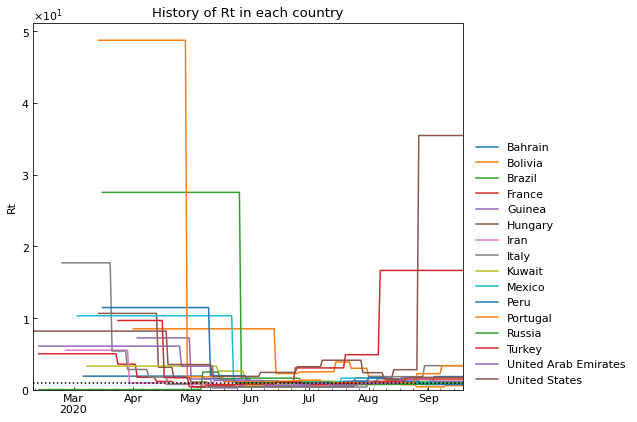

Country,Bahrain,Bolivia,Brazil,France,Guinea,Hungary,Iran,Italy,Kuwait,Mexico,Peru,Portugal,Russia,Turkey,United Arab Emirates,United States
Date,,,,,,,,,,,,,,,,
2020-09-15,1.83,0.58,0.92,16.63,0.8,35.44,1.15,3.35,1.17,0.88,0.72,3.34,0.92,1.49,1.15,1.72
2020-09-16,1.83,0.58,0.92,16.63,0.8,35.44,1.15,3.35,1.17,0.88,0.72,3.34,0.92,1.49,1.15,1.72
2020-09-17,1.83,0.58,0.92,16.63,0.8,35.44,1.15,3.35,1.17,0.88,0.72,3.34,0.92,1.49,1.15,1.72
2020-09-18,1.83,0.58,0.92,16.63,0.8,35.44,1.15,3.35,1.17,0.88,0.72,3.34,0.92,1.49,1.15,1.72
2020-09-19,1.83,0.58,0.92,16.63,0.8,35.44,1.15,3.35,1.17,0.88,0.72,3.34,0.92,1.49,1.15,1.72


In [14]:
analyser.param_history("Rt", roll_window=None).tail()

### $\rho$: Effective contact rate $\mathrm{[-]}$

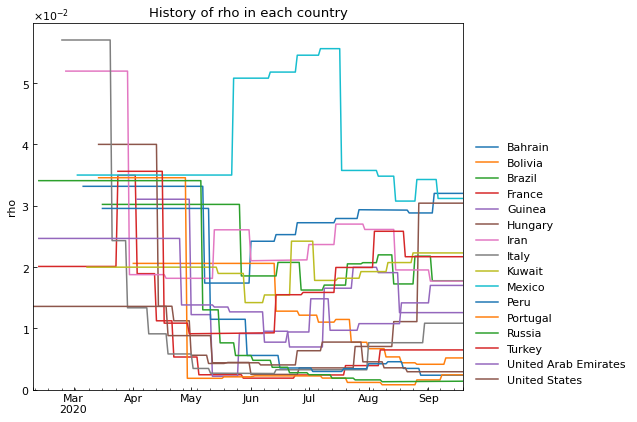

Country,Bahrain,Bolivia,Brazil,France,Guinea,Hungary,Iran,Italy,Kuwait,Mexico,Peru,Portugal,Russia,Turkey,United Arab Emirates,United States
Date,,,,,,,,,,,,,,,,
2020-09-15,0.032007,0.005178,0.017767,0.006484,0.012565,0.030412,0.017708,0.010839,0.022298,0.031179,0.002361,0.002422,0.001386,0.021679,0.017001,0.002928
2020-09-16,0.032007,0.005178,0.017767,0.006484,0.012565,0.030412,0.017708,0.010839,0.022298,0.031179,0.002361,0.002422,0.001386,0.021679,0.017001,0.002928
2020-09-17,0.032007,0.005178,0.017767,0.006484,0.012565,0.030412,0.017708,0.010839,0.022298,0.031179,0.002361,0.002422,0.001386,0.021679,0.017001,0.002928
2020-09-18,0.032007,0.005178,0.017767,0.006484,0.012565,0.030412,0.017708,0.010839,0.022298,0.031179,0.002361,0.002422,0.001386,0.021679,0.017001,0.002928
2020-09-19,0.032007,0.005178,0.017767,0.006484,0.012565,0.030412,0.017708,0.010839,0.022298,0.031179,0.002361,0.002422,0.001386,0.021679,0.017001,0.002928


In [15]:
analyser.param_history("rho", roll_window=None).tail()

### $\sigma$: Recovery rate $\mathrm{[-]}$

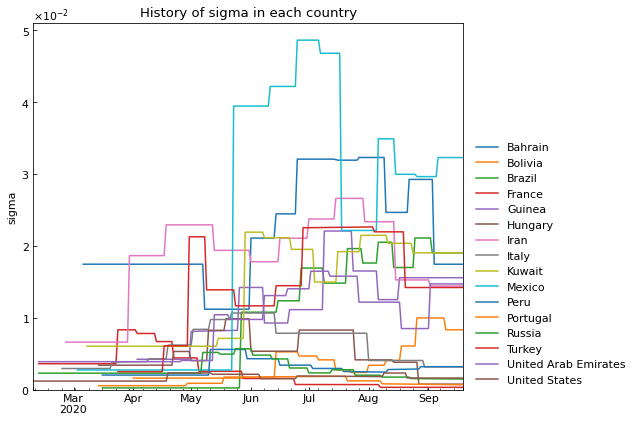

Country,Bahrain,Bolivia,Brazil,France,Guinea,Hungary,Iran,Italy,Kuwait,Mexico,Peru,Portugal,Russia,Turkey,United Arab Emirates,United States
Date,,,,,,,,,,,,,,,,
2020-09-15,0.017438,0.008329,0.019009,0.00033,0.015564,0.000773,0.01441,0.003173,0.019022,0.032263,0.003197,0.000685,0.001478,0.014204,0.014704,0.001623
2020-09-16,0.017438,0.008329,0.019009,0.00033,0.015564,0.000773,0.01441,0.003173,0.019022,0.032263,0.003197,0.000685,0.001478,0.014204,0.014704,0.001623
2020-09-17,0.017438,0.008329,0.019009,0.00033,0.015564,0.000773,0.01441,0.003173,0.019022,0.032263,0.003197,0.000685,0.001478,0.014204,0.014704,0.001623
2020-09-18,0.017438,0.008329,0.019009,0.00033,0.015564,0.000773,0.01441,0.003173,0.019022,0.032263,0.003197,0.000685,0.001478,0.014204,0.014704,0.001623
2020-09-19,0.017438,0.008329,0.019009,0.00033,0.015564,0.000773,0.01441,0.003173,0.019022,0.032263,0.003197,0.000685,0.001478,0.014204,0.014704,0.001623


In [16]:
analyser.param_history("sigma", roll_window=None).tail()

### $\kappa$: Mortality rate of infected cases $\mathrm{[-]}$

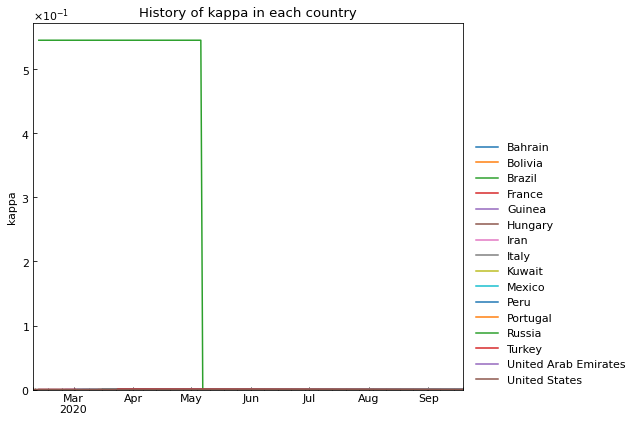

Country,Bahrain,Bolivia,Brazil,France,Guinea,Hungary,Iran,Italy,Kuwait,Mexico,Peru,Portugal,Russia,Turkey,United Arab Emirates,United States
Date,,,,,,,,,,,,,,,,
2020-09-15,0.000084,0.000046,0.000384,0.00006,0.000185,0.000085,0.000945,0.00006,0.00006,0.000777,0.000069,0.000041,0.000006,0.000309,0.000024,0.00007
2020-09-16,0.000084,0.000046,0.000384,0.00006,0.000185,0.000085,0.000945,0.00006,0.00006,0.000777,0.000069,0.000041,0.000006,0.000309,0.000024,0.00007
2020-09-17,0.000084,0.000046,0.000384,0.00006,0.000185,0.000085,0.000945,0.00006,0.00006,0.000777,0.000069,0.000041,0.000006,0.000309,0.000024,0.00007
2020-09-18,0.000084,0.000046,0.000384,0.00006,0.000185,0.000085,0.000945,0.00006,0.00006,0.000777,0.000069,0.000041,0.000006,0.000309,0.000024,0.00007
2020-09-19,0.000084,0.000046,0.000384,0.00006,0.000185,0.000085,0.000945,0.00006,0.00006,0.000777,0.000069,0.000041,0.000006,0.000309,0.000024,0.00007


In [17]:
analyser.param_history("kappa", roll_window=None).tail()

### $\theta$: Mortality rate of S$^\ast$ cases $\mathrm{[-]}$

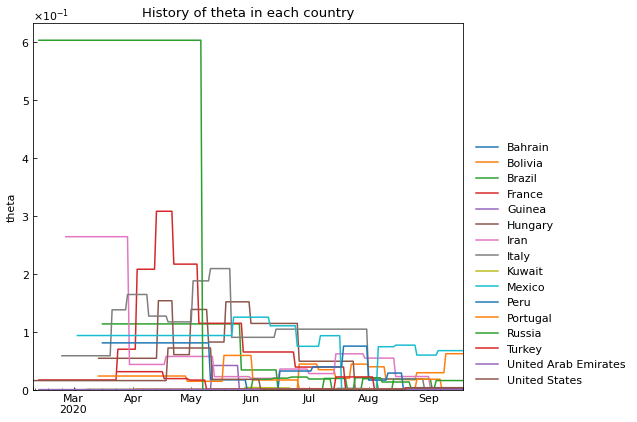

Country,Bahrain,Bolivia,Brazil,France,Guinea,Hungary,Iran,Italy,Kuwait,Mexico,Peru,Portugal,Russia,Turkey,United Arab Emirates,United States
Date,,,,,,,,,,,,,,,,
2020-09-15,0.000453,0.062056,0.000652,0.000239,0.000439,0.000823,0.003057,0.000239,0.000158,0.067375,0.00172,0.000019,0.01578,0.003232,0.000667,0.003489
2020-09-16,0.000453,0.062056,0.000652,0.000239,0.000439,0.000823,0.003057,0.000239,0.000158,0.067375,0.00172,0.000019,0.01578,0.003232,0.000667,0.003489
2020-09-17,0.000453,0.062056,0.000652,0.000239,0.000439,0.000823,0.003057,0.000239,0.000158,0.067375,0.00172,0.000019,0.01578,0.003232,0.000667,0.003489
2020-09-18,0.000453,0.062056,0.000652,0.000239,0.000439,0.000823,0.003057,0.000239,0.000158,0.067375,0.00172,0.000019,0.01578,0.003232,0.000667,0.003489
2020-09-19,0.000453,0.062056,0.000652,0.000239,0.000439,0.000823,0.003057,0.000239,0.000158,0.067375,0.00172,0.000019,0.01578,0.003232,0.000667,0.003489


In [18]:
analyser.param_history("theta", roll_window=None).tail()

## (Experimental): Relationship of OxCGRT index and parameter values
Government responses will impact on parameter values of ODE models about 14 days later. Here, we will investigate on the relationship of [stringency index (from OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker/blob/master/documentation/index_methodology.md) and reproduction number/model parameters.


In [19]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [20]:
df = analyser.track()
param_cols = ["Rt", *cs.SIRF.PARAMETERS]
oxcgrt_cols = oxcgrt_data.OXCGRT_VARS[:]
cols = param_cols + oxcgrt_cols
delay = 14

for col in param_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")
    df[col] = df.groupby("Country")[col].shift(0 - delay)

df = df.dropna(how="any")
df = df.loc[:, ["Date", "Country", *cols]]
track_df = df.copy()
track_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50004 entries, 0 to 50213
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Date                                 50004 non-null  datetime64[ns]
 1   Country                              50004 non-null  object        
 2   Rt                                   50004 non-null  float64       
 3   theta                                50004 non-null  float64       
 4   kappa                                50004 non-null  float64       
 5   rho                                  50004 non-null  float64       
 6   sigma                                50004 non-null  float64       
 7   School_closing                       50004 non-null  int64         
 8   Workplace_closing                    50004 non-null  int64         
 9   Cancel_events                        50004 non-null  int64         
 10  Gatherings

In [21]:
# Correlation
df = track_df.copy()
df.corr().style.background_gradient(axis=None)

,Rt,theta,kappa,rho,sigma,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
Rt,1.000000,-0.237332,-0.236785,0.253586,-0.202375,-0.032604,0.070784,-0.073449,-0.045597,-0.113890,-0.125514,-0.152597,-0.172766,-0.046586,-0.120818,-0.247191,-0.061206
theta,-0.237332,1.000000,0.976650,0.722309,-0.046693,-0.222157,-0.112473,-0.289563,-0.290071,-0.291427,0.128561,-0.075731,0.138327,-0.339811,-0.316019,0.011472,-0.148850
kappa,-0.236785,0.976650,1.000000,0.710814,-0.104569,-0.254235,-0.156893,-0.306630,-0.284997,-0.285680,0.117523,-0.072485,0.160559,-0.357463,-0.251320,0.008567,-0.185928
rho,0.253586,0.722309,0.710814,1.000000,0.084441,-0.149546,-0.068794,-0.338892,-0.306085,-0.295974,0.109760,-0.135021,0.008232,-0.366283,-0.430799,-0.176068,-0.149715
sigma,-0.202375,-0.046693,-0.104569,0.084441,1.000000,0.217902,0.032283,0.087635,-0.112142,0.025034,0.032280,-0.049557,-0.032879,0.108627,-0.117426,0.135818,0.104080
School_closing,-0.032604,-0.222157,-0.254235,-0.149546,0.217902,1.000000,0.738233,0.737202,0.659907,0.549260,0.570538,0.529665,0.483758,0.727326,0.433956,0.294371,0.817263
Workplace_closing,0.070784,-0.112473,-0.156893,-0.068794,0.032283,0.738233,1.000000,0.725780,0.764092,0.572790,0.684610,0.657333,0.486863,0.780792,0.454438,0.305706,0.868918
Cancel_events,-0.073449,-0.289563,-0.306630,-0.338892,0.087635,0.737202,0.725780,1.000000,0.811730,0.497914,0.544559,0.643935,0.560168,0.897555,0.619895,0.596307,0.844301
Gatherings_restrictions,-0.045597,-0.290071,-0.284997,-0.306085,-0.112142,0.659907,0.764092,0.811730,1.000000,0.701064,0.656216,0.753584,0.606917,0.826404,0.642769,0.392942,0.868492
Transport_closing,-0.113890,-0.291427,-0.285680,-0.295974,0.025034,0.549260,0.572790,0.497914,0.701064,1.000000,0.605531,0.672996,0.541331,0.536188,0.354467,0.165466,0.751399


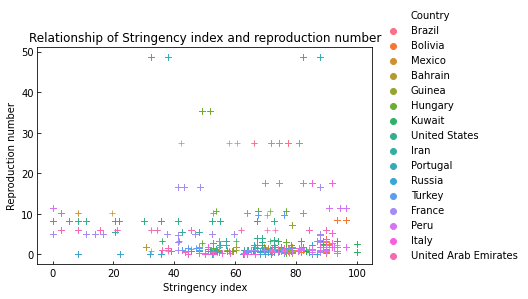

In [22]:
# Scatter plot of Stringency index and Rt
df = track_df.copy()
sns.scatterplot(data=df, x="Stringency_index", y="Rt", hue="Country", legend="brief", marker="+")
bbox_to_anchor=(1.02, 0)
bbox_loc="lower left"
plt.legend(bbox_to_anchor=bbox_to_anchor, loc=bbox_loc, borderaxespad=0)
plt.title("Relationship of Stringency index and reproduction number")
plt.ylabel("Reproduction number")
plt.xlabel("Stringency index")
plt.show()